Entropic Regularization of Optimal Transport
============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This numerical tours exposes the general methodology of regularizing the
optimal transport (OT) linear program using entropy. This allows to
derive fast computation algorithm based on iterative projections
according to a Kulback-Leiber divergence.
$$ \DeclareMathOperator{\KL}{KL}
\newcommand{\KLdiv}[2]{\KL\pa{#1 | #2}}
\newcommand{\KLproj}{\text{Proj}^{\tiny\KL}}
\renewcommand{\epsilon}{\varepsilon}
\def\ones{\mathbb{I}} $$

In [5]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import pylab as pyl
from time import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Entropic Regularization of Optimal Transport
--------------------------------------------
We consider two input histograms $a,b \in \Si_n$, where we denote the simplex in $\RR^n$
$$ \Si_n \eqdef \enscond{ a \in \RR_+^n }{ \sum_i a_i = 1 }.  $$
We consider the following discrete regularized transport
$$  W_\epsilon(a,b) \eqdef \umin{P \in U(a,b)} \dotp{C}{P} - \epsilon E(P).  $$
where the polytope of coupling is defined as
$$ U(a,b) \eqdef \enscond{P \in (\RR^+)^{n \times m}}{ P \ones_m = a, P^\top \ones_n = b },  $$
where $\ones_n \eqdef (1,\ldots,1)^\top \in \RR^n $,
and for $P \in \RR_+^{n \times m}$, we define its entropy as
$$ E(P) \eqdef -\sum_{i,j} P_{i,j} ( \log(P_{i,j}) - 1). $$


When $\epsilon=0$ one recovers the classical (discrete) optimal transport.
We refer to the monograph [Villani](#biblio) for more details about OT.
The idea of regularizing transport to allows for faster computation is
introduced in [Cuturi](#biblio).


Here the matrix $C \in (\RR^+)^{n \times m} $ defines the ground cost, i.e.
$C_{i,j}$ is the cost of moving mass from a bin indexed by $i$ to a bin indexed by $j$.


The regularized transportation problem can be re-written as a projection
$$ W_\epsilon(a,b) = \epsilon \umin{P \in U(a,b)} \KLdiv{P}{K}
	\qwhereq
	K_{i,j} \eqdef e^{ -\frac{C_{i,j}}{\epsilon} }  $$
of the Gibbs kernel $K$ according to the Kullback-Leibler divergence.
The Kullback-Leibler divergence between $P, K \in \RR_+^{n \times m}$ is
$$ \KLdiv{P}{K} \eqdef \sum_{i,j} P_{i,j} \pa{ \log\pa{ \frac{P_{i,j}}{K_{i,j}} } - 1}. $$


This interpretation of regularized transport as a KL projection and its numerical
applications are detailed in [BenamouEtAl](#biblio).


Given a convex set $\Cc \subset \RR^N$, the projection according to the Kullback-Leiber divergence is defined as
$$ \KLproj_\Cc(\xi) = \uargmin{ \pi \in \Cc } \KLdiv{\pi}{\xi}. $$

Iterative Bregman Projection Algorithm
--------------------------------------
Given affine constraint sets $ (\Cc_1,\Cc_2) $, we aim at computing
$$   \KLproj_\Cc(K) \qwhereq \Cc = \Cc_1 \cap \Cc_2 $$
(this description can of course be extended to more than 2 sets). 

This can be achieved, starting by $P_0=K$, by iterating $\forall \ell \geq 0$, 
$$ P_{2\ell+1} =  \KLproj_{\Cc_1}(P_{2\ell}) 
 \qandq 
  P_{2\ell+2} =  \KLproj_{\Cc_2}(P_{2\ell+1}). $$

One can indeed show that $P_\ell \rightarrow \KLproj_\Cc(K)$.
We refer to [BauschkeLewis](#biblio) for more details about this
algorithm and its extension to compute the projection on the intersection of
convex sets (Dikstra algorithm).

Sinkhorn's Algorithm
-----------------------------------------------------------------------

A fundamental remark is that the optimality condition of the entropic regularized problem shows that the optimal coupling $P_\epsilon$ necessarily has the form 
$$P_\epsilon = \diag{u} K \diag{v}$$
where the Gibbs kernel is defined as
$$K \eqdef e^{-\frac{C}{\epsilon}}.$$

One thus needs to find two positive scaling vectors $u \in \RR_+^n$ and $v \in \RR_+^m$ such that the two following equality holds
$$P \ones  = u \odot (K v) = a 
\qandq
P^\top \ones  = v \odot (K^\top u) = b.$$

Sinkhorn's algorithm alternate between the resolution of these two equations, and reads
$$u \longleftarrow \frac{a}{K v} \qandq v \longleftarrow \frac{b}{K^\top u}.$$
This algorithm was shown to converge to a solution of the entropic regularized problem by [Sinkhorn](#biblio).

Transport Between Point Clouds
------------------------------
We first test the method for two input measures that are uniform measures
(i.e. constant histograms) supported on two point clouds
(that do not necessarily have the same size).


We thus first load two points clouds $x=(x_i)_{i=1}^{n}, y=(y_i)_{i=1}^{m}, $
where $x_i, y_i \in \RR^2$.


Number of points in each cloud, $N=(n,m)$.

In [6]:
N = [60,80]
n, m = N

Dimension of the clouds.

In [7]:
d = 2

Point cloud $x$, of $n$ points inside a square.

Point cloud $y$, of $m$ points inside an anulus.

In [8]:
# Circle
np.random.seed(42)
angles = 2*np.pi * np.random.rand(n)
x = 0.6 * np.array([np.cos(angles), np.sin(angles)])

# Square
sides =np.split(2*np.random.rand(m)-1, 4)
y = np.array([np.concatenate((sides[0], np.ones_like(sides[1]), -np.ones_like(sides[2]), sides[3])),
              np.concatenate((np.ones_like(sides[0]), sides[1], sides[2], -np.ones_like(sides[0])))])


Shortcut for displaying point clouds.

In [9]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)

Display of the two clouds.

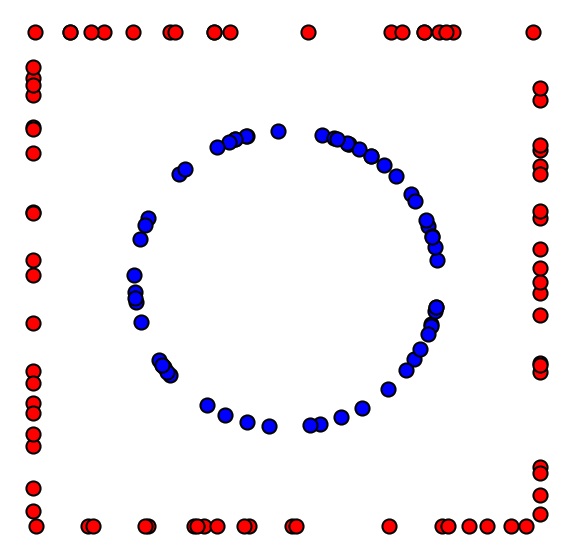

In [10]:
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

Cost matrix $C_{i,j} = \norm{x_i-y_j}^2$.

In [11]:
x2 = np.sum(x**2,0)
y2 = np.sum(y**2,0)
C = np.tile(y2,(N[0],1)) + np.tile(x2[:,np.newaxis],(1,N[1])) - 2*np.dot(np.transpose(x),y)

In [12]:
a = np.ones(N[0])/N[0]
b = np.ones(N[1])/N[1]

Target histograms $(a,b)$, here uniform histograms.

Regularization strength $\epsilon>0$.

Gibbs Kernel $K$.

Initialization of $v=\ones_{m}$ ($u$ does not need to be
initialized).

One sinkhorn iterations.

__Exercise 1__

Implement Sinkhorn algorithm.
Display the evolution of the constraints satisfaction errors
$$ \norm{ P \ones - a }_1 \qandq \norm{ P^\top \ones - b } $$
(you need to think about how to compute these residuals from $(u,v)$ alone).
Display the violation of constraint error in log-plot.

In [13]:
# Sinkhorn algorithm
def sinkhorn(K, a, b, iterations):
    # init 
    n, m = K.shape
    v = np.ones(m)
    ones = np.ones(m)
    ones2 = np.ones(shape=(n,1))
    P_a = []
    P_b = []
    for iter in range(iterations): 
        # update vectors
        u = a / np.dot(K, v)
        P_b.append(np.linalg.norm(b - v*np.dot(K.T, u), ord=1))
        v = b / np.dot(np.transpose(K), u)
        P_a.append(np.linalg.norm(a - u * np.dot(K, v), ord=1))
    
    P = np.diag(u) @ K @ np.diag(v)
    return P, P_a, P_b, u, v

In [14]:
iterations = 1000
epsilon = 0.01;
K = np.exp(-C/epsilon)
P, P_a, P_b, _, _ = sinkhorn(K, a, b, iterations)

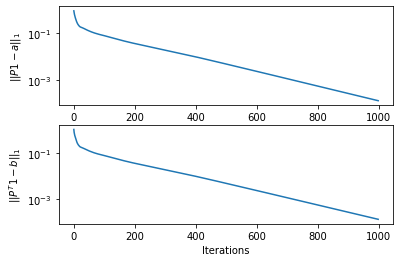

In [15]:
plt.figure()
plt.subplot(211)
plt.semilogy(P_a)
plt.ylabel("$|| P1 -a||_1$")
plt.xlabel("Iterations")
plt.subplot(212)
plt.semilogy(P_b)
plt.ylabel("$|| P^T1 - b||_1$")
plt.xlabel("Iterations")
plt.show()

Display the final matrix $P$.



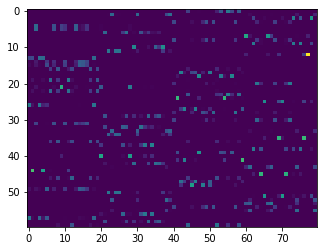

In [16]:
plt.imshow(P);

__Exercise 2__

Display the regularized transport solution for various values of $\epsilon$.
For a too small value of $\epsilon$, what do you observe ?

Since $K_{i j} = \exp(-\frac{C_{i j}}{\epsilon})$, for small values of $\epsilon$ we get $K_{i j} \simeq 0 $ and then the updates of the Sinkhorn algorithm became unstable. We observe this behaviour for $\epsilon=0.0001$, where $P$ full of NaNs.  Conversely, for big values of $\epsilon$ we obtain $K_{i j} \simeq 1$, which leads to a non-sparse solutions.

Time for eps=0.0001: 0.0771331787109375
Time for eps=0.001: 0.13894319534301758
Time for eps=0.01: 0.11736464500427246
Time for eps=0.1: 0.11857175827026367
Time for eps=1.0: 0.12024545669555664
Time for eps=10.0: 0.12470841407775879


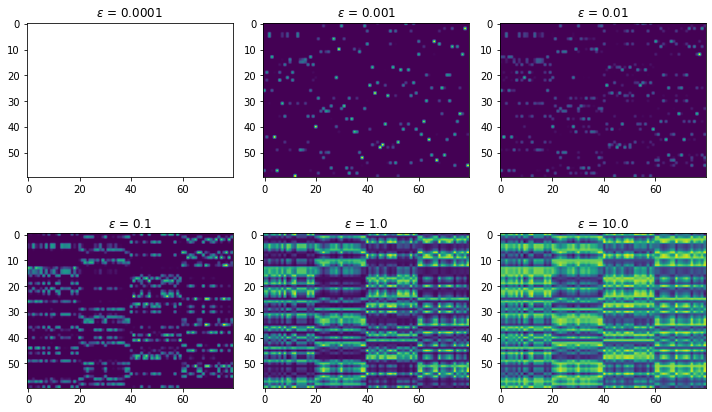

In [17]:
iterations = 2000
epsilons = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1];

plt.figure(figsize=(10, 6))
for i, epsilon in enumerate(epsilons):
    tic = time()  
    K = np.exp(-C/epsilon)
    P, _, _, _, _ = sinkhorn(K, a, b, iterations)
    print(f"Time for eps={epsilon}: {time() - tic}")
    plt.subplot(2,3,i+1)
    plt.title(f"$\epsilon$ = {epsilon}")
    plt.imshow(P)
plt.tight_layout()
plt.show()

Compute the obtained optimal $P$.

Keep only the highest entries of the coupling matrix, and use them to
draw a map between the two clouds.
First we draw "strong" connexions, i.e. linkds $(i,j)$ corresponding to
large values of $P_{i,j}$.
We then draw weaker connexions.

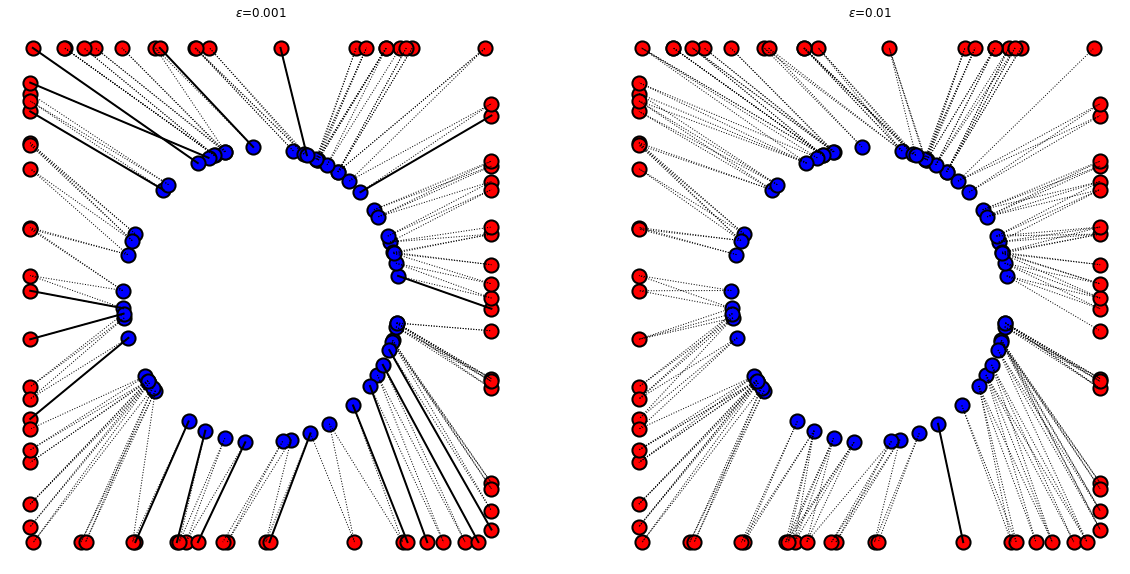

In [18]:
plt.figure(figsize=(20,10))

epsilons = [0.001, 0.01]
for i, epsilon in enumerate(epsilons): 
    K = np.exp(-C/epsilon)
    P, _, _, u, v = sinkhorn(K, a, b, iterations)

    plt.subplot(1,2,i+1)

    plotp(x, 'b')
    plotp(y, 'r')

    A = P * (P > np.max(P)*.8)
    i,j = np.where(A != 0)
    plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k',lw = 2)

    A = P * (P > np.max(P)*.2)
    i,j = np.where(A != 0)
    plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k:',lw = 1)
    plt.title(f"$\epsilon$={epsilon}")

    plt.axis("off")
    plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
    plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

Transport Between Histograms
----------------------------
We now consider a different setup, where the histogram values
$a,b$ are not uniform, but the measures are defined on a uniform grid
$x_i=y_i=i/n$. They are thue often refered to as "histograms".


Size $n$ of the histograms.

In [19]:
N = 200

We use here a 1-D square Euclidean metric.

In [20]:
t = np.arange(0,N)/N

Define the histogram $a,b$ as translated Gaussians.

In [21]:
Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)
Uniform = lambda t0, start, end: 1.0 if start <= t0 <= end else 0

sigma = .06;
a = Gaussian(.5,sigma) + Gaussian(.65,sigma/2)
b = Gaussian(.2,0.8*sigma) +  Gaussian(.8,0.8*sigma)

Add some minimal mass and normalize.

In [22]:
vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

Display the histograms.

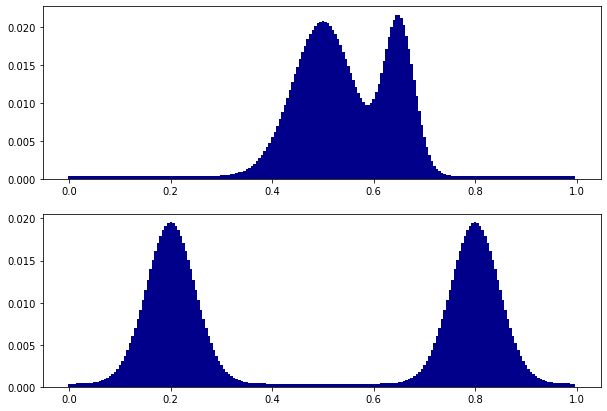

In [23]:
plt.figure(figsize = (10,7))

plt.subplot(2, 1, 1)
plt.bar(t, a, width = 1/len(t), color = "darkblue")
plt.subplot(2, 1, 2)
plt.bar(t, b, width = 1/len(t), color = "darkblue")

plt.show()

Regularization strength $\ga$.

In [24]:
epsilon = (.03)**2

The Gibbs kernel is a Gaussian convolution,
$$ K_{i,j} \eqdef e^{ -(i/N-j/N)^2/\epsilon }. $$

In [25]:
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X-Y)**2/epsilon)

Initialization of $v=\ones_{N}$.

In [26]:
v = np.ones(N)

One sinkhorn iteration.

In [27]:
u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))

__Exercise 3__

Implement Sinkhorn algorithm.
Display the evolution of the constraints satisfaction errors
$ \norm{ P \ones - a }_1, \norm{ P^\top \ones - b }_1$. You need to think how to compute it from $(u,v)$.
Display the violation of constraint error in log-plot.

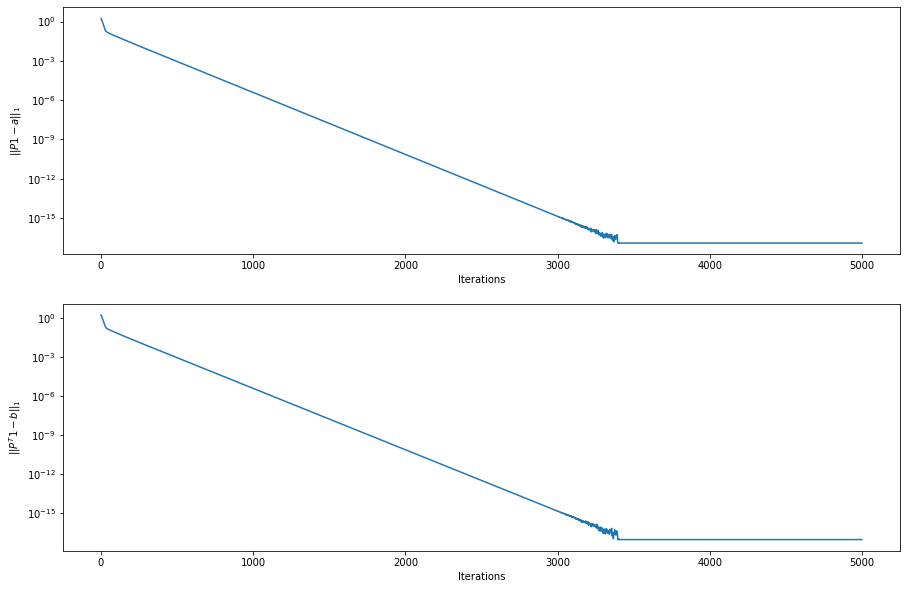

In [28]:
P, P_a, P_b, u, v = sinkhorn(K, a, b, iterations=5000)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.semilogy(P_a)
plt.ylabel("$|| P1 -a||_1$")
plt.xlabel("Iterations")
plt.subplot(212)
plt.semilogy(P_b)
plt.ylabel("$|| P^T1 - b||_1$")
plt.xlabel("Iterations")
plt.show()

We check that the original histograms can be obtained from the optimal coupling.

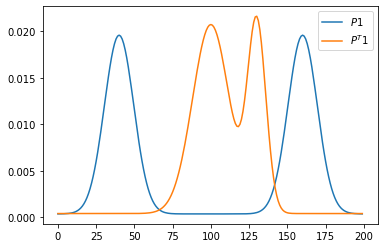

In [29]:
plt.figure()
plt.plot(P.sum(axis=0), label="$P1$")
plt.plot(P.sum(axis=1), label="$P^T1$")
plt.legend()
plt.show()

Display the coupling. Use a log domain plot to better vizualize it.

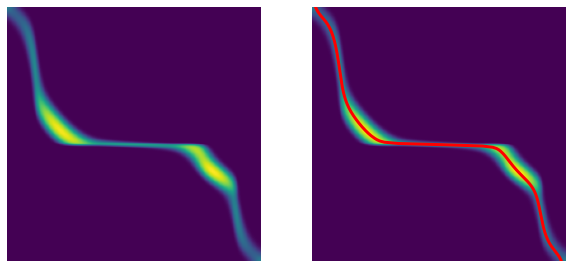

In [30]:
def plot_barycenter(P, v, u, t):
    plt.figure(figsize=(10,20))
    plt.subplot(121)
    plt.imshow(np.log(P+1e-5))
    plt.axis('off');
    s = np.dot(K,v*t)*u/a
    plt.subplot(122)
    plt.imshow(np.log(P+1e-5))
    plt.plot(s*N,t*N, 'r', linewidth=3);
    plt.axis('off');

plot_barycenter(P, v, u, t)

One can compute an approximation of the transport plan
between the two measure by computing the so-called barycentric projection map
$$ t_i \in [0,1] \longmapsto s_j \eqdef \frac{\sum_{j} P_{i,j} t_j }{ \sum_{j} P_{i,j} }
   =  \frac{ [u \odot K(v \odot t)]_j }{ a_i }. $$
where $\odot$ and $\frac{\cdot}{\cdot}$ are the enry-wise multiplication and division.


This computation can thus be done using only multiplication with the
kernel $K$.

Display the transport map, super-imposed over the coupling.

__Exercise (bonus)__

Try different regularization strength $\epsilon$.

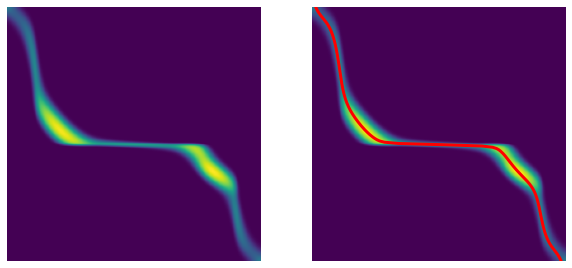

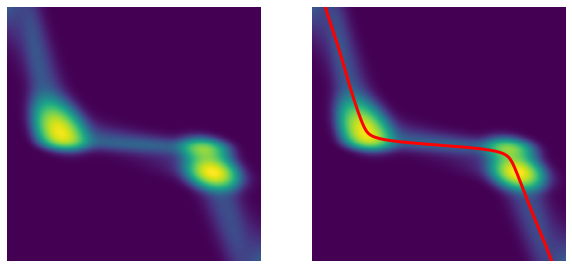

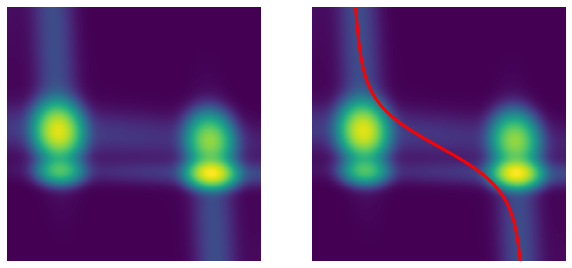

In [31]:
iterations = 5000
epsilons = [0.001, 0.01, 0.1];
for i, epsilon in enumerate(epsilons):    
    K = np.exp(-(X-Y)**2/epsilon)
    P, _, _, u, v = sinkhorn(K, a, b, iterations)
    plot_barycenter(P, v, u, t)
plt.show()

Using GPUs
-----------------------

We will use here [Pytorch](https://pytorch.org/) to implement Sinkhorn on the GPU. If you are running the code on Google Colab, this means you need to switch on in the preferences the use of a GPU.

In [32]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print( device )

cuda:0


Since CUDA uses float number on 32 bits, one needs to use a quite large value for $\epsilon$ to avoid overflow.

When using Pytorch, it is good practice to implement matrix operation as summation and dummy variables.  We show here how to implement one iteration of Sinkhorn this way.

__Exercise:__

Implement the full algorithm.

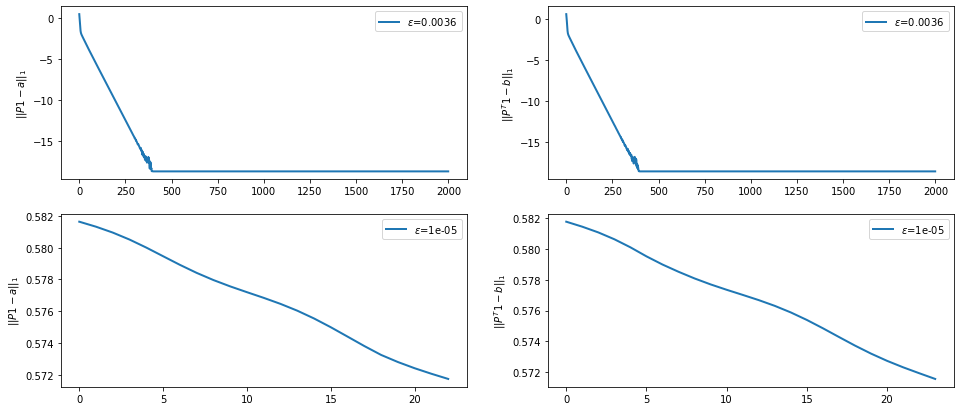

In [33]:
def sinkhorn_gpu(K, a, b, niter=2000):
    v = torch.ones(N).to(K.device)
    Err_p = torch.zeros(niter)
    Err_q = torch.zeros(niter)
    for i in range(niter):
        # sinkhorn step 1
        u = a / (K * v[None,:]).sum(1)    
        # error computation
        r = v*(K * u[:,None]).sum(0)
        Err_q[i] = torch.norm(r - b, p=1)
        # sinkhorn step 2
        v = b / (K * u[:,None]).sum(0)
        s = u*(K * v[None,:]).sum(1)
        Err_p[i] = torch.norm(s - a,p=1)

    return Err_p, Err_q

epsilon1 = (.06)**2
K = np.exp(-(X-Y)**2/epsilon1)
K1 = torch.from_numpy(K).type(torch.FloatTensor).to(device)
a1 = torch.from_numpy(a).type(torch.FloatTensor).to(device)
b1 = torch.from_numpy(b).type(torch.FloatTensor).to(device)

Err_p1, Err_q1 = sinkhorn_gpu(K1, a1, b1, 2000)

epsilon2 = 0.00001
K = np.exp(-(X-Y)**2/epsilon2)
K1 = torch.from_numpy(K).type(torch.FloatTensor).to(device)
Err_p2, Err_q2 = sinkhorn_gpu(K1, a1, b1, 2000)

plt.figure(figsize = (16,7))
plt.subplot(2,2,1)
plt.ylabel("$||P1 -a||_1$")
plt.plot(np.log(np.asarray(Err_p1)), linewidth = 2, label=f"$\epsilon$={epsilon1}")
plt.legend()
plt.subplot(2,2,2)
plt.ylabel("$||P^T 1 -b||_1$")
plt.plot(np.log(np.asarray(Err_q1)), linewidth = 2, label=f"$\epsilon$={epsilon1}")
plt.legend()

plt.subplot(2,2,3)
plt.ylabel("$||P1 -a||_1$")
plt.plot(np.log(np.asarray(Err_p2)), linewidth = 2, label=f"$\epsilon$={epsilon2}")
plt.legend()
plt.subplot(2,2,4)
plt.ylabel("$||P^T 1 -b||_1$")
plt.plot(np.log(np.asarray(Err_q2)), linewidth = 2, label=f"$\epsilon$={epsilon2}")
plt.legend()
plt.show()

__Exercice__
To avoid underflow, replace the matrix/vector multiplication in a log-sum-exp style, and use the log-sum-exp stabilization trick.

We implement the stabilization trick and use to run Sinkhron with $\epsilon = 0.0001$. without the trick the algorith fails to converge due to underflow.

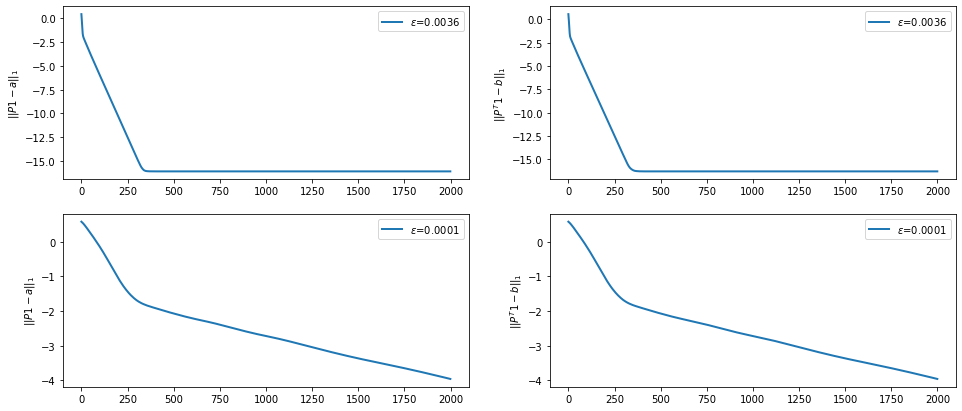

In [34]:
def sinkhorn_stable(log_K, a, b, niter):
    log_a = torch.log(a)
    log_b = torch.log(b)
    log_v = torch.zeros(N).to(a.device)
    Err_p = torch.zeros(niter)
    Err_q = torch.zeros(niter)
    for i in range(niter):
        # sinkhorn step 1
        log_u = log_a - torch.logsumexp(log_K + log_v[None,:], 1)    
        # error computation
        r = torch.exp(log_v + torch.logsumexp(log_K + log_u[:,None], 0))
        Err_q[i] = torch.norm(r - b, p=1)
        # sinkhorn step 2
        log_v = log_b - torch.logsumexp(log_K + log_u[:,None], 0)
        s = torch.exp(log_u + torch.logsumexp(log_K + log_v[None,:], 1))
        Err_p[i] = torch.norm(s - a, p=1)

    return Err_p, Err_q

epsilon1 = (.06)**2
log_K1 = torch.tensor(-(X-Y)**2/epsilon1).to("cuda")
Err_p1, Err_q1 = sinkhorn_stable(log_K1, a1, b1, 2000)

epsilon2 = 0.0001
log_K2 = torch.tensor(-(X-Y)**2/epsilon2).to("cuda")
Err_p2, Err_q2 = sinkhorn_stable(log_K2, a1, b1, 2000)

plt.figure(figsize = (16,7))
plt.subplot(2,2,1)
plt.ylabel("$||P1 -a||_1$")
plt.plot(np.log(np.asarray(Err_p1)), linewidth = 2, label=f"$\epsilon$={epsilon1}")
plt.legend()
plt.subplot(2,2,2)
plt.ylabel("$||P^T 1 -b||_1$")
plt.plot(np.log(np.asarray(Err_q1)), linewidth = 2, label=f"$\epsilon$={epsilon1}")
plt.legend()

plt.subplot(2,2,3)
plt.ylabel("$||P1 -a||_1$")
plt.plot(np.log(np.asarray(Err_p2)), linewidth = 2, label=f"$\epsilon$={epsilon2}")
plt.legend()
plt.subplot(2,2,4)
plt.ylabel("$||P^T 1 -b||_1$")
plt.plot(np.log(np.asarray(Err_q2)), linewidth = 2, label=f"$\epsilon$={epsilon2}")
plt.legend()
plt.show()

The log-sum-exp trick allow to use smaller values of epsilon as shown in the plots.

Wasserstein Barycenters
-----------------------
Instead of computing transport, we now turn to the problem of computing
barycenter of $R$ input measures $(a_k)_{k=1}^R$. A barycenter $b$ solves
$$ \umin{b} \sum_{k=1}^R W_\ga(a_k,b)  $$
where $\la_k$ are positive weights with $\sum_k \la_k=1$. This
follows the definition of barycenters proposed in
[AguehCarlier](#biblio).

Dimension (width of the images) $N$ of the histograms.

You need to install imageio, for instance using
> conda install -c conda-forge imageio

If you need to rescale the image size, you can use
> skimage.transform.resize

In [35]:
!pip install imageio

Load input histograms $(a_k)_{k=1}^R$, store them in a tensor $A$.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import imageio
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/optimal_transport/nt_toolbox/data/"
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','letter-x']
vmin = .01
N = 70
R = 4
A = np.zeros((N,N,R))
for i in range(len(names)):
    a = imageio.imread(DATA_PATH + names[i] + ".bmp")
    a = normalize(rescale(a)+vmin)
    A[:,:,i] = a

# Custom data
square = np.zeros((N, N))
square[20:50, 20:50] = 1
square = normalize(rescale(square)+vmin)
A[:,:,2] = square

tri = np.zeros((N, N))
for i in range(30):
    tri[15 + i, 10 + 25-i: 10 + 25+i] = 1
tri = normalize(rescale(tri)+vmin)
A[:,:,3] = tri



Display the input histograms.

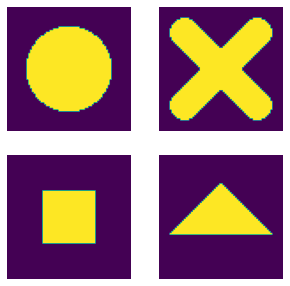

In [38]:
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(A[:,:,i])
    plt.axis('off');

In this specific case, the kernel $K$ associated with the
squared Euclidean norm is a convolution with a Gaussian filter
$$ K_{i,j} = e^{ -\norm{i/N-j/N}^2/\epsilon } $$
where here $(i,j)$ are 2-D indexes.


The multiplication against the kernel, i.e. $K(a)$, 
can now be computed efficiently, using fast convolution methods. 
This crucial points was exploited and generalized in [SolomonEtAl](#biblio)
to design fast optimal transport algorithm.

Regularization strength $\epsilon>0$.

In [39]:
epsilon = (.04)**2

Define the $K$ kernel.
We use here the fact that the convolution is separable to implement it
using only 1-D convolution, which further speeds up computations.

In [40]:
t = np.linspace(0,1,N)
[Y,X] = np.meshgrid(t,t)
K1 = np.exp(-(X-Y)**2/epsilon)
K = lambda x: np.dot(np.dot(K1,x),K1)

Display the application of the $K$ kernel on one of the input histogram.

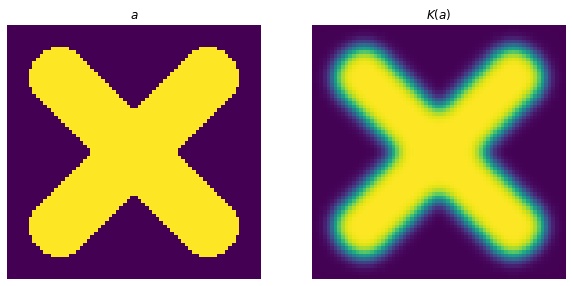

In [41]:
idx = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(A[:,:,idx])
plt.title("$a$")
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(K(A[:,:,idx]))
plt.title("$K(a)$")
plt.axis('off');

Weights $\la_k$ for isobarycenter.

In [42]:
lambd = np.ones(R)/R

It is shown in [BenamouEtAl](#biblio) that the problem of Barycenter computation
boilds down to
optimizing over couplings $(P_k)_{k=1}^R$, and that this can be achieved
using iterative a Sinkhorn-like algorithm, since the optimal coupling has the scaling form
$$P_k = \diag{u_k} K \diag{v_k}$$
for some unknown positive weights $(u_k,v_k)$.

Initialize the scaling factors $(u_k,v_k)_k$, store them in matrices.

In [43]:
v = np.ones([N,N,R])
u = np.copy(v)

The first step of the Bregman projection method corresponds to the
projection on the fixed marginals constraints $P^k \ones = a_k$. This
is achieved by updating
$$ \forall k=1,\ldots,R, \quad u_k \longleftarrow \frac{a_k}{ K( v_k ) }. $$

In [44]:
for k in range(R):
    u[:,:,k] = A[:,:,k]/K(v[:,:,k])

The second step of the Bregman projection method corresponds to the
projection on the equal marginals constraints $\forall k, P_k^\top \ones=b$ for a common barycenter target $b$. This
is achieved by first computing the target barycenter $b$ using a geometric means
$$ \log(b) \eqdef \sum_k \lambda_k \log( u_{k} \odot K ( v_{k} ) ). $$

In [45]:
b = np.zeros(N)
for k in range(R):
    b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
b = np.exp(b)

Display $b$.

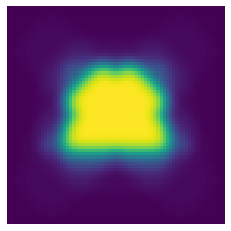

In [46]:
plt.imshow(b);
plt.axis('off');

And then one can update the scaling by a Sinkhorn step using this newly computed histogram $b$ as follow (note that $K=K^\top$ here):
$$ \forall k=1,\ldots,R, \quad v_{k} \longleftarrow \frac{b}{ K(u_{k}) }. $$

In [47]:
for k in range(R):
    v[:,:,k] = b/K(u[:,:,k])

__Exercise 4__

Implement the iterative algorithm to compute the iso-barycenter of the measures.
Plot the decay of the error $\sum_k \norm{P_k \ones - a_k} $.

In [108]:
def barycenters(A, lambd, iterations):

    # Init vectors
    v = np.ones([N,N,R])
    u = np.copy(v)

    P_a = []
    for iter in range(iterations):
        # Step 1: Project P1 = a
        for k in range(R):
            u[:,:,k] = A[:,:,k]/K(v[:,:,k])

        # Step 2: Project PT1 = b
        b = np.zeros(N)
        for k in range(R):
            b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
        b = np.exp(b)

        # Step 3: Update
        for k in range(R):
            v[:,:,k] = b/K(u[:,:,k])

        P_a.append(np.sum([np.linalg.norm(A[:,:,i] - u[:,:,i] * K(v[:,:,i]), ord=1) for i in range(R)]))
    return b, P_a

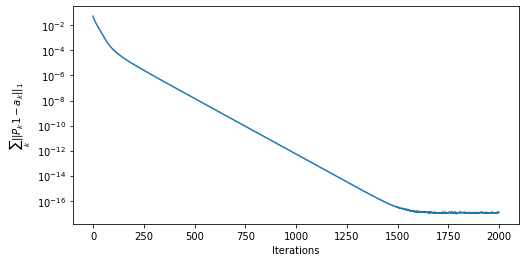

In [109]:
b, P_a = barycenters(A, np.ones(R)/R, 2000)

plt.figure(figsize = (8,4))
plt.ylabel("$\sum_k ||P_k 1 -a_k||_1$")
plt.xlabel("Iterations")
plt.semilogy(P_a)

Text(0.5, 1.0, 'Iso-barycenter')

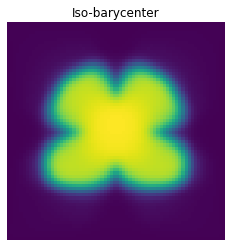

In [110]:
plt.imshow(b);
plt.axis('off');
plt.title("Iso-barycenter")

Display the barycenter.

__Exercise 5__

Compute barycenters for varying weights $\la$ corresponding to
a bilinear interpolation inside a square.

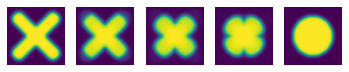

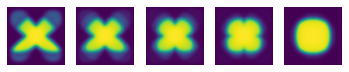

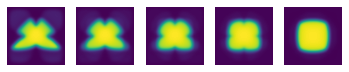

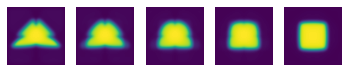

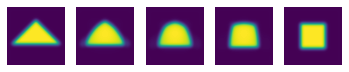

In [111]:
num = 5
t2 = np.zeros((num,4))
t2[:, 0] = np.linspace(0,1,num)
t2[:, 1] = 1- np.linspace(0,1,num)

t1 = np.zeros((num,4))
t1[:, 2] = np.linspace(0,1,num)
t1[:, 3] = 1- np.linspace(0,1,num)

weights = np.linspace(0,1,num)
interpolations = np.zeros((num, num, 4))
for i in range(num):
    interpolations[i] = weights[i] * t1 + (1 - weights[i]) * t2

for interpolation in interpolations:
    for i, row in enumerate(interpolation):
        b, _ = barycenters(A, row, iterations = 10)
        plt.subplot(1,num,i+1)
        plt.imshow(b)
        plt.axis("off")
    plt.show()

In the middle of the grid we recover the iso-barycenter

Bibliography
------------
<html><a name="biblio"></a></html>


* [Villani] C. Villani, (2009). Optimal transport: old and new, volume 338. Springer Verlag.
* [Cuturi] M. Cuturi, (2013). Sinkhorn distances: Lightspeed computation of optimal transport. In Burges, C. J. C., Bottou, L., Ghahramani, Z., and Weinberger, K. Q., editors, Proc. NIPS, pages 2292-2300.
* [AguehCarlier] M. Agueh, and G Carlier, (2011). Barycenters in the Wasserstein space. SIAM J. on Mathematical Analysis, 43(2):904-924.
* [CuturiDoucet] M. Cuturi and A. Doucet (2014). Fast computation of wasserstein barycenters. In Proc. ICML.
* [BauschkeLewis] H. H. Bauschke and A. S. Lewis. Dykstra's algorithm with Bregman projections: a convergence proof. Optimization, 48(4):409-427, 2000.
* [Sinkhorn] R. Sinkhorn. A relationship between arbitrary positive matrices and doubly stochastic matrices. Ann. Math. Statist., 35:876-879, 1964.
* [SolomonEtAl] J. Solomon, F. de Goes, G. Peyr , M. Cuturi, A. Butscher, A. Nguyen, T. Du, and L. Guibas. Convolutional Wasserstein distances: Efficient optimal transportation on geometric domains. Transaction on Graphics, Proc. SIGGRAPH, 2015.
* [BenamouEtAl] J-D. Benamou, G. Carlier, M. Cuturi, L. Nenna, G. Peyr . Iterative Bregman Projections for Regularized Transportation Problems. SIAM Journal on Scientific Computing, 37(2), pp. A1111-A1138, 2015.